In [273]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [274]:
#loading dataset
heart= pd.read_excel('heartdisease.xlsx')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [275]:
heart.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [276]:
heart = heart.replace(['?'],np.nan)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [277]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

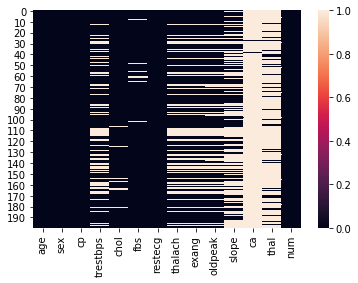

In [278]:
sns.heatmap(heart.isnull())

Dropping Column CA

In [279]:
heart=heart.drop(['ca'],axis=1)
heart=heart.drop(['thal'],axis=1)

In [280]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy ='mean')
imputer.fit(heart.iloc[:,:])
heart.iloc[:,:] = imputer.transform(heart.iloc[:,:])

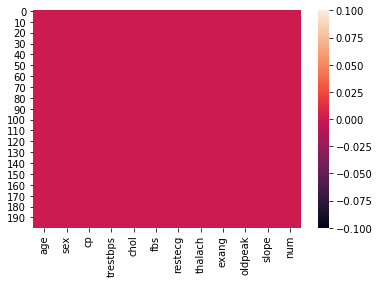

In [281]:
sns.heatmap(heart.isnull())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001E3C7F48>,
      dtype=object)

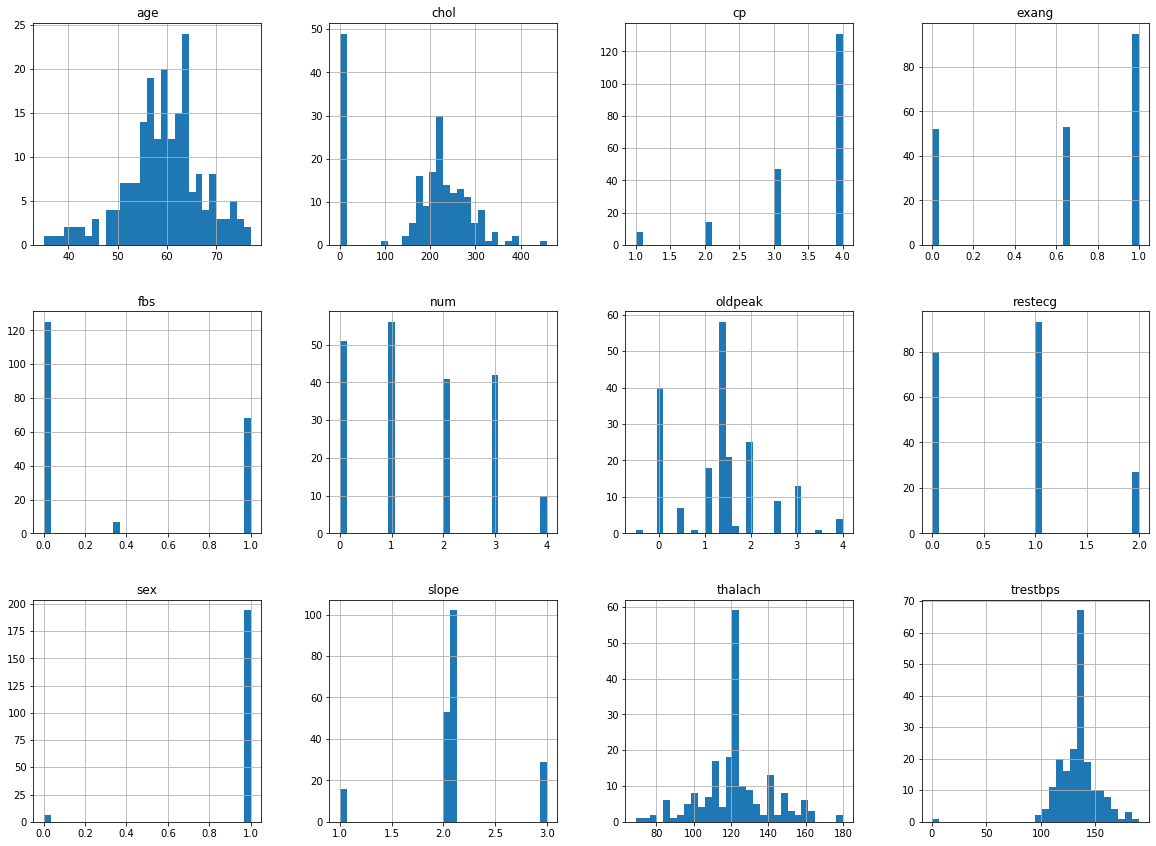

In [282]:
heart.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [283]:
heart.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.634130
restecg     0.391463
thalach     0.148515
exang      -0.719015
oldpeak     0.423414
slope      -0.222767
num         0.297393
dtype: float64

In [284]:
#reducing skewness
skew=('sex','cp','trestbps','thalach')
for col in skew:
    if heart.skew().loc[col]>0.55:
        heart[col]=np.log1p(heart[col])

In [285]:
heart.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.634130
restecg     0.391463
thalach     0.148515
exang      -0.719015
oldpeak     0.423414
slope      -0.222767
num         0.297393
dtype: float64

In [286]:
z=np.abs(zscore(heart))
threshhold=3
print(np.where(z>3))

(array([ 24,  33,  51,  66,  70,  72,  76,  79,  96,  97, 126, 128, 131,
       133, 137, 176, 190, 195, 196], dtype=int64), array([7, 3, 1, 2, 7, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2],
      dtype=int64))


In [287]:
heart_new=heart[(z<3).all(axis=1)]
print(heart.shape,'\t',heart_new.shape)

(200, 12) 	 (181, 12)


In [288]:
heart_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63.0,1.0,4.0,140.000000,260.0,0.0,1.0,112.000000,1.000000,3.000000,2.000000,2.0
1,44.0,1.0,4.0,130.000000,209.0,0.0,1.0,127.000000,0.000000,0.000000,2.132653,0.0
2,60.0,1.0,4.0,132.000000,218.0,0.0,1.0,140.000000,1.000000,1.500000,3.000000,2.0
3,55.0,1.0,4.0,142.000000,228.0,0.0,1.0,149.000000,1.000000,2.500000,1.000000,1.0
4,66.0,1.0,3.0,110.000000,213.0,1.0,2.0,99.000000,1.000000,1.300000,2.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
193,62.0,1.0,4.0,158.000000,170.0,0.0,1.0,138.000000,1.000000,0.000000,2.132653,1.0
194,46.0,1.0,4.0,134.000000,310.0,0.0,0.0,126.000000,0.000000,0.000000,2.132653,2.0
197,55.0,1.0,4.0,122.000000,223.0,1.0,1.0,100.000000,0.000000,0.000000,2.132653,2.0
198,58.0,1.0,4.0,133.763889,385.0,1.0,2.0,122.795918,0.646259,1.320833,2.132653,0.0


In [289]:
x=heart_new.drop('num',axis=1)
y=heart_new.iloc[:,-1].values

In [290]:
model = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(kernel = 'rbf', random_state = 0),GaussianNB(),RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)]
max_accuracy_score=0
for r_state in range(80,90):
    x_train , x_test , y_train, y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    for i_c in model:
        i_c.fit(x_train,y_train)
        pre_c=i_c.predict(x_test)
        ac_score=accuracy_score(y_test,pre_c)
        print ("accuracy score correspond to random state " ,r_state,'is',ac_score)
        if ac_score>max_accuracy_score:
            max_accuracy_score=ac_score
            final_state=r_state
            final_model=i_c

print()
print()
print()
print()

print('max accuracy score correspond to random state',final_state,'is',max_accuracy_score,'and model is',final_model)

accuracy score correspond to random state  80 is 0.32432432432432434
accuracy score correspond to random state  80 is 0.24324324324324326
accuracy score correspond to random state  80 is 0.21621621621621623
accuracy score correspond to random state  80 is 0.2972972972972973
accuracy score correspond to random state  80 is 0.16216216216216217
accuracy score correspond to random state  80 is 0.1891891891891892
accuracy score correspond to random state  81 is 0.2972972972972973
accuracy score correspond to random state  81 is 0.3783783783783784
accuracy score correspond to random state  81 is 0.2972972972972973
accuracy score correspond to random state  81 is 0.3783783783783784
accuracy score correspond to random state  81 is 0.16216216216216217
accuracy score correspond to random state  81 is 0.24324324324324326
accuracy score correspond to random state  82 is 0.32432432432432434
accuracy score correspond to random state  82 is 0.1891891891891892
accuracy score correspond to random state

### We are not able to achive accuracy more than 45%, need more data.